# Download Codes

In [1]:
!git clone https://github.com/TurtleJayWang/VC-SDFGen2.git
import os
import sys
os.chdir('VC-SDFGen2')
sys.path.append(os.getcwd())

%pip install trimesh

fatal: destination path 'VC-SDFGen2' already exists and is not an empty directory.
Note: you may need to restart the kernel to use updated packages.


In [2]:
!git pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), 470 bytes | 470.00 KiB/s, done.
From https://github.com/TurtleJayWang/VC-SDFGen2
   ffffd3e..40dfd25  main       -> origin/main
Updating ffffd3e..40dfd25
Fast-forward
 trainer/BaseTrainer.py | 11 +++++++----
 1 file changed, 7 insertions(+), 4 deletions(-)


# Train DeepSDF

## Data preparation
In this notebook, we use data downloaded from kaggle using kagglehub

In [3]:
import kagglehub
shapenetsdf_path = kagglehub.dataset_download("turtlejaywang/shapenetsdf")

## Training Loop
* **DeepSDFTrainer** : This is the trainer which handles the training of DeepSDF model
* **DeepSDF** : This is the model which is trained, the trained parameter is saved to *result_dir*

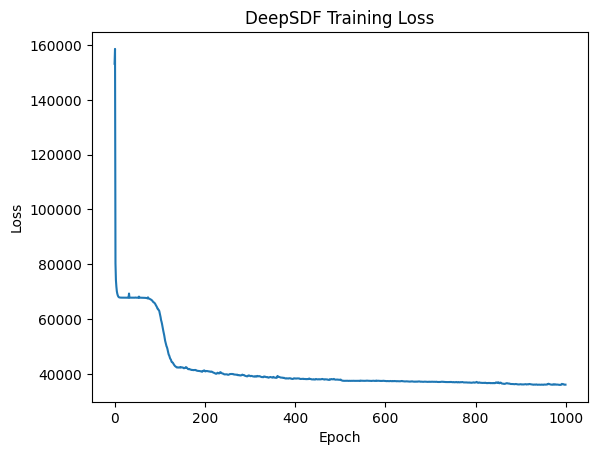

 50%|█████     | 1009/2000 [4:41:30<4:36:18, 16.73s/it]

: 

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from IPython.display import clear_output

from trainer.DeepSDFTrainer import DeepSDFTrainer
from data.dataset import ShapeNetSDF
from model.DeepSDF import DeepSDF

deepsdf_model = DeepSDF(latent_dim=512, hidden_dim=512, n_hidden_layers=8)
deepsdf_dataset = ShapeNetSDF(shapenetsdf_path)

deepsdf_model_infos = {
    "deepsdf" : {
        "model" : deepsdf_model,
        "init_lr" : 1e-3
    }
}

deepsdf_trainer = DeepSDFTrainer(
    deepsdf_model_infos,
    deepsdf_dataset,
    epochs=2000, batch_size=18, 
    results_dir="results_deepsdf_latent512_hidden512_dropout02",
    model_save_frequency=100
)

for e, losses in tqdm(deepsdf_trainer, total=deepsdf_trainer.epochs - deepsdf_trainer.get_latest_epoch()):
    if e % 10 == 0:
        clear_output()
        x = np.arange(len(losses))
        plt.plot(x, losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('DeepSDF Training Loss')
        plt.show()

## Visualize

In [ ]:
from visualize import Visualizer
import random

generate_index = random.randint(0, len(deepsdf_dataset))
visualizer = Visualizer(deepsdf_trainer.deepsdf_model, deepsdf_trainer.embeddings)
visualizer.generate_sdf_objs(generate_index)

AttributeError: 'DeepSDF' object has no attribute 'voxel_grid_size'

# Train VCCNF

## Data Preparation

In [ ]:
shapenetvoxel32_path = kagglehub.dataset_download("turtlejaywang/shapenetvoxel64")

## Training Loop
* **VCCNF**: This is the main CNF wrapper which contains a ODE network and a voxel encoder
* **VCCNFTrainer** : This is the trainer object which handles training affairs.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from IPython.display import clear_output

from trainer.VCCNFTrainer import VCCNFTrainer
from data.dataset import ShapeNetVoxel32
from model.VCCNF import VCCNF

vccnf_model = VCCNF(latent_dim=512, hidden_dim=512, n_hidden_layers=8)
shapenetvoxel32 = ShapeNetVoxel32(shapenetsdf_path)

vccnf_trainer = VCCNFTrainer(
    deepsdf_model,
    shapenetvoxel32,
    epochs=2000, batch_size=24, 
    results_dir="results_deepsdf_latent512_hidden512_dropout02"
)

for e, losses in tqdm(enumerate(vccnf_trainer), total=vccnf_trainer.epochs):
    if e % 10 == 0:
        clear_output()
        x = np.arange(len(losses))
        plt.plot(x, losses)
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title('VCCNF Training Loss')
        plt.show()